In [1]:
from datasets import MNIST
from evaluation.plots import compare_compression_ratio_vs_accuracy
from models import Lenet
import torch.nn as nn
from pruning.unstructured import *
from evaluation import *


Importing /raid/home/prabhasreddy/yaswanth/smart-pruner/pruning/unstructured/L1norm.py
Importing /raid/home/prabhasreddy/yaswanth/smart-pruner/pruning/Train.py
Importing /raid/home/prabhasreddy/yaswanth/smart-pruner/pruning/structured/decay_pruning.py
Importing /raid/home/prabhasreddy/yaswanth/smart-pruner/pruning/structured/two_to_four.py


/raid/home/prabhasreddy/yaswanth/smart-pruner/venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = Lenet()
dataset = MNIST()

Pruning technique: UnstructuredL1normPrune


 20%|██        | 1/5 [00:02<00:08,  2.11s/it]

Epoch: 1 | train_loss: 4.2824 | 


 40%|████      | 2/5 [00:03<00:04,  1.65s/it]

Epoch: 2 | train_loss: 2.9622 | 


 60%|██████    | 3/5 [00:04<00:03,  1.51s/it]

Epoch: 3 | train_loss: 2.4536 | 


 80%|████████  | 4/5 [00:06<00:01,  1.44s/it]

Epoch: 4 | train_loss: 2.0555 | 


100%|██████████| 5/5 [00:07<00:00,  1.49s/it]


Epoch: 5 | train_loss: 1.7884 | 
Training is done


100%|██████████| 5/5 [00:00<00:00, 32.14it/s]

Pruning with compression ratio - 0.1
Pruning with compression ratio - 0.3
Pruning with compression ratio - 0.5
Pruning with compression ratio - 0.7
Pruning with compression ratio - 0.9
Pruning is done


Accuracy of the model without pruning is [98.43]
compression_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]
accuracies = [array([98.4]), array([98.45]), array([97.64]), array([90.69]), array([25.38])]


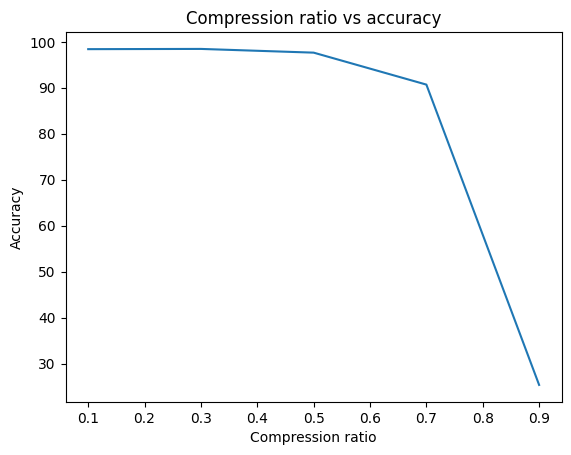

Pruning technique: DecayPrune


 20%|██        | 1/5 [00:01<00:05,  1.33s/it]

Epoch: 1 | train_loss: 1.5551 | 


 40%|████      | 2/5 [00:02<00:04,  1.34s/it]

Epoch: 2 | train_loss: 1.2053 | 


 60%|██████    | 3/5 [00:04<00:02,  1.36s/it]

Epoch: 3 | train_loss: 0.9639 | 


 80%|████████  | 4/5 [00:05<00:01,  1.39s/it]

Epoch: 4 | train_loss: 0.7190 | 


100%|██████████| 5/5 [00:06<00:00,  1.37s/it]


Epoch: 5 | train_loss: 0.6010 | 
Training is done


100%|██████████| 5/5 [00:00<00:00, 291.60it/s]

Pruning with compression ratio - 0.1
Pruning with compression ratio - 0.3
Pruning with compression ratio - 0.5
Pruning with compression ratio - 0.7
Pruning with compression ratio - 0.9
Pruning is done


Accuracy of the model without pruning is [69.96]
compression_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]
accuracies = [array([69.96]), array([69.96]), array([69.96]), array([69.96]), array([69.96])]


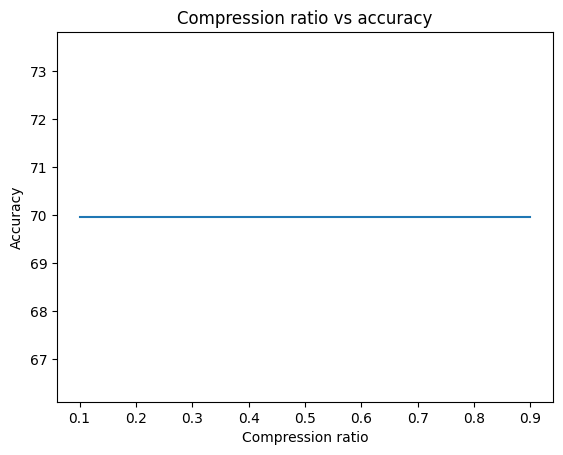

In [3]:

compare_compression_ratio_vs_accuracy(model, dataset)

In [4]:
train_loader, test_loader = dataset.get_dataloader()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

trainer = UnstructuredL1normPrune(model, 5, train_loader, criterion, optimizer, 0.8)

#train and prune the model and return both the original and pruned model
original_model, pruned_model = trainer.train_prune_retrain()

  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:01<00:05,  1.31s/it]

Epoch: 1 | train_loss: 2.3275 | 


 40%|████      | 2/5 [00:02<00:03,  1.32s/it]

Epoch: 2 | train_loss: 1.4199 | 


 60%|██████    | 3/5 [00:03<00:02,  1.31s/it]

Epoch: 3 | train_loss: 1.0519 | 


 80%|████████  | 4/5 [00:05<00:01,  1.31s/it]

Epoch: 4 | train_loss: 0.8714 | 


100%|██████████| 5/5 [00:06<00:00,  1.36s/it]

Epoch: 5 | train_loss: 0.4616 | 
Training is done
Pruning is done


In [5]:
print("Original model : ", measure_latency_cpu_usage(original_model, test_loader))
print("Pruned model : ", measure_latency_cpu_usage(pruned_model, test_loader))

Original model :  (1.3299596309661865, 15.8)
Pruned model :  (1.4364311695098877, 13.9)
